<a href="https://colab.research.google.com/github/srikavya26/Credit-Default/blob/main/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction

 **Credit Default - Lending Club Dataset kaggle**

 ***Dataset - https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv***

**Install Required Libraries**

**Import Required Libraries**

**Read the Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

req_cols = [
 'loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment',
 'grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status',
 'purpose','addr_state','dti','delinq_2yrs','fico_range_low','fico_range_high',
 'fico_range','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
 'loan_status'
]

header = pd.read_csv('loan.csv', nrows=0)
available = header.columns.tolist()
use_cols = [c for c in desired_cols if c in available]
print('Loading columns:', use_cols)

df = pd.read_csv('loan.csv', usecols=use_cols, low_memory=True)
df.head()

Loading columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'loan_status']


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,2500,2500,2500,36 months,13.56,84.92,C,C1,10+ years,RENT,...,debt_consolidation,NY,18.24,0.0,1.0,9.0,1.0,4341.0,10.3,34.0
1,30000,30000,30000,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,...,debt_consolidation,LA,26.52,0.0,0.0,13.0,1.0,12315.0,24.2,44.0
2,5000,5000,5000,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,...,debt_consolidation,MI,10.51,0.0,0.0,8.0,0.0,4599.0,19.1,13.0
3,4000,4000,4000,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,...,debt_consolidation,WA,16.74,0.0,0.0,10.0,0.0,5468.0,78.1,13.0
4,30000,30000,30000,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,...,debt_consolidation,MD,26.35,0.0,0.0,12.0,0.0,829.0,3.6,26.0


In [ ]:
if 'fico_range' in df.columns and ('fico_range_low' not in df.columns):
    parts = df['fico_range'].str.split('-', expand=True)
    df['fico_range_low'] = pd.to_numeric(parts[0], errors='coerce')
    df['fico_range_high'] = pd.to_numeric(parts[1], errors='coerce')

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,2500,2500,2500,36 months,13.56,84.92,C,C1,10+ years,RENT,...,debt_consolidation,NY,18.24,0.0,1.0,9.0,1.0,4341.0,10.3,34.0
1,30000,30000,30000,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,...,debt_consolidation,LA,26.52,0.0,0.0,13.0,1.0,12315.0,24.2,44.0
2,5000,5000,5000,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,...,debt_consolidation,MI,10.51,0.0,0.0,8.0,0.0,4599.0,19.1,13.0
3,4000,4000,4000,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,...,debt_consolidation,WA,16.74,0.0,0.0,10.0,0.0,5468.0,78.1,13.0
4,30000,30000,30000,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,...,debt_consolidation,MD,26.35,0.0,0.0,12.0,0.0,829.0,3.6,26.0


**EDA**

In [ ]:
def map_default(x):
    return 1 if x in ['Charged Off','Default','Late (31-120 days)'] else 0

df['default'] = df['loan_status'].apply(map_default)
df.drop(columns=['loan_status'], inplace=True)
df['default'].value_counts(normalize=True)

,proportion
default,
0,0.998549
1,0.001451


In [ ]:
for col in df.select_dtypes('float'):
    df[col] = pd.to_numeric(df[col], downcast='float')
for col in df.select_dtypes('int'):
    df[col] = pd.to_numeric(df[col], downcast='integer')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19993 entries, 0 to 19992
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            19993 non-null  int32  
 1   funded_amnt          19993 non-null  int32  
 2   funded_amnt_inv      19993 non-null  int32  
 3   term                 19993 non-null  object 
 4   int_rate             19993 non-null  float32
 5   installment          19993 non-null  float32
 6   grade                19992 non-null  object 
 7   sub_grade            19992 non-null  object 
 8   emp_length           18201 non-null  object 
 9   home_ownership       19992 non-null  object 
 10  annual_inc           19992 non-null  float64
 11  verification_status  19992 non-null  object 
 12  purpose              19992 non-null  object 
 13  addr_state           19992 non-null  object 
 14  dti                  19949 non-null  float32
 15  delinq_2yrs          19992 non-null 

In [ ]:
df.isna().mean().sort_values(ascending=False).head(20)

,0
emp_length,0.089631
dti,0.002201
revol_util,0.001100
home_ownership,0.000050
grade,0.000050
verification_status,0.000050
annual_inc,0.000050
addr_state,0.000050
delinq_2yrs,0.000050
open_acc,0.000050


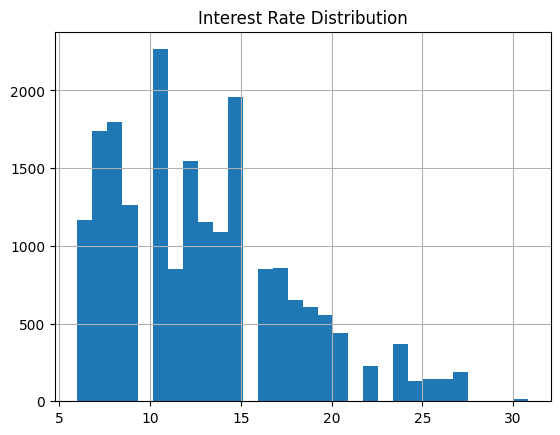

In [ ]:
df['int_rate'].hist(bins=30)
plt.title('Interest Rate Distribution')
plt.show()

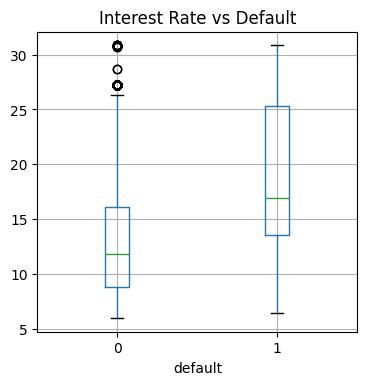

In [ ]:
df.boxplot(column='int_rate', by='default', figsize=(4,4))
plt.title('Interest Rate vs Default')
plt.suptitle('')
plt.show()

In [ ]:
df.corr(numeric_only=True)['default'].sort_values(ascending=False).head(15)

,default
default,1.000000
int_rate,0.039873
inq_last_6mths,0.016119
installment,0.004601
annual_inc,-0.000275
funded_amnt_inv,-0.002660
loan_amnt,-0.002669
funded_amnt,-0.002669
pub_rec,-0.005632
delinq_2yrs,-0.006582


**Model - 1**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['default'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_cols = X.select_dtypes(include=['float32','float64','int32','int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

numeric_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transform, num_cols),
    ("cat", categorical_transform, cat_cols)
])


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_cols = df.select_dtypes(include=['float32','float64','int32','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

numeric_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, num_cols),
        ('cat', categorical_transform, cat_cols)
    ]
)

preprocessor


Numeric columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']
Categorical columns: ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state']


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state'],
      dtype='object'))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RF ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


RF ROC-AUC: 0.6928374655647384


*Model -1 Metrics*

**Model - 2**

In [ ]:
from xgboost import XGBClassifier

xgb = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    ))
])

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)



XGB ROC-AUC: 0.7628767008932298


*Model -2 Metrics*

In [ ]:
print("XGB ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


**Model - 3**

 *Model -3 Metrics*

**Model - 4**



*Model - 4 Metrics*


**Model - 5**

*Model -5 Metrics*

#Evaluating Results

#Conclusion